In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

Estimate for alpha is  0.5034075389782326
Estimate for beta is  0.4853317835255204


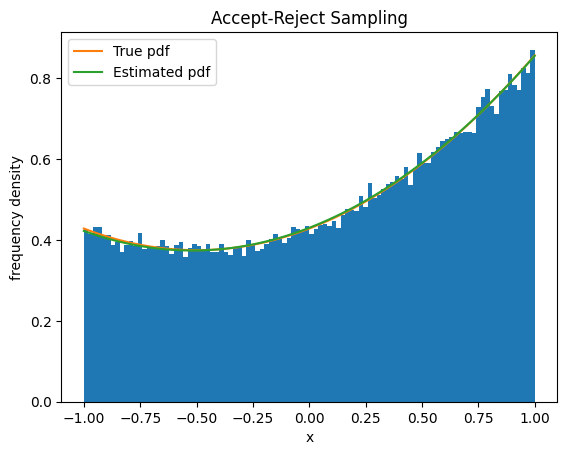

In [30]:
#range of x
a=-1
b=1
xrange = (a,b)

#true parameters
alpha=0.5
beta=0.5

#function of interest
def func(x):
    return 1 + alpha*x + beta*x**2

#'normalise' for the range we're looking at
normalization_factor, error = quad(func, *xrange)

def pdf(x):
    return func(x)/normalization_factor


# get the max-value in y
"""from scipy.optimize import brute
f = lambda x: -pdf(x)
x = brute(f, [xrange])
ymax = -f( x[0] )
print(ymax)"""
ymax=2

#algo
def gen_accept_reject(size=1):
    res = []
    while len(res)<size:
        a = np.random.uniform(*xrange)
        b = np.random.uniform(0,ymax)
        y = pdf(a)
        if y > ymax:
            print('Some issue: as y larger than ymax')
        if b <= y:
            res.append(a)
    return res


def d(k):
    return (b**k - a**k)/k

mu1=np.mean(v) #mean
mu2=np.mean(np.array(v)**2) #second moment

alpha_est = ((d(2)-d(1)*mu1)*(d(3)*mu2-d(5)) + (d(3)-d(1)*mu2)*(d(4)-d(3)*mu1))/((d(2)*mu1-d(3))*(d(3)*mu2-d(5)) - (d(4)-d(2)*mu2)*(d(4)-d(3)*mu1))
print('Estimate for alpha is ', alpha_est)

beta_est = ((d(3)-d(1)*mu2)*(d(2)*mu1-d(3)) + (d(2)-d(1)*mu1)*(d(4)-d(2)*mu2))/((d(2)*mu1-d(3))*(d(3)*mu2-d(5)) - (d(4)-d(2)*mu2)*(d(4)-d(3)*mu1))
print('Estimate for beta is ', beta_est)

#function using estimated parameters
def func_est(x):
    return 1 + alpha_est*x + beta_est*x**2

#'normalise' for the range we're looking at
normalization_factor_est, error = quad(func_est, *xrange)

def pdf_est(x):
    return func_est(x)/normalization_factor_est


#plot results
v=gen_accept_reject(100000) # v is the sample
x_ax=np.linspace(*xrange,100)
plt.hist(v, range=xrange, bins=100, density=True)
plt.plot(x_ax,pdf(x_ax))
#add plot to graph
plt.plot(x_ax,pdf_est(x_ax))
plt.xlabel("x")
plt.ylabel("frequency density")
plt.title("Accept-Reject Sampling")
plt.legend(["True pdf","Estimated pdf"])
plt.show()


In [35]:
def model(x, alpha, beta):
    return (1 + alpha*x + beta*x**2)/normalization_factor

from iminuit import Minuit
from iminuit.cost import UnbinnedNLL

# create a cost function
nll=UnbinnedNLL(v, model)

# create Minuit object
m = Minuit(nll, alpha=0.5, beta=0.5)

# run the fit
m.migrad()

#run the Hesse algorithm
m.hesse()

# print the result
print(m)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -2.171e+07                 │             Nfcn = 2005              │
│ EDM = 2.19e-86 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────